DATA SCIENCE IN TELCO DATA CLEANSING

Case :

DQLab Telco is a Telco company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has consistently paid attention to its customer experience so that customers will not be left behind.
Although only a little over 1 year old, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wanted to reduce the number of customer churn by using machine learning.
Therefore, the Data Scientist team was asked to prepare data as well as create an appropriate prediction model to determine whether or not customers would churn.

The dataset used has been provided in csv format.
The data details are as follows:

•	UpdatedAt Periode of Data taken
•	customerID Customer ID
•	gender Whether the customer is a male or a female (Male, Female)
•	SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
•	Partner Whether the customer has a partner or not (Yes, No)
•	Dependents Whether the customer has dependents or not (Yes, No)
•	tenure Number of months the customer has stayed with the company
•	PhoneService Whether the customer has a phone service or not (Yes, No)
•	MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
•	InternetService Customer’s internet service provider (DSL, Fiber optic, No)
•	OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
•	OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
•	DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
•	TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
•	StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
•	StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
•	Contract The contract term of the customer (Month-to-month, One year, Two year)
•	PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
•	PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
•	MonthlyCharges The amount charged to the customer monthly
•	TotalCharges The total amount charged to the customer
•	Churn Whether the customer churned or not (Yes or No)

Tasks and Steps :
As a data scientist, we are asked to prepare data before modeling.
In this assignment, you will do Data Preprocessing (Data Cleansing) last month, June 2020.
The steps that will be taken are,
1.	Search for a valid customer ID (phone number)
2.	Resolve data that is still empty (Missing Values)
3.	Resolving Outlier Values of each Variable
4.	Standardizing the Value of the Variable

In [6]:
# Import Data Source
import pandas as pd
pd.options.display.max_columns = 50

# Loading dataset
url = "https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv"
df_load = pd.read_csv(url)
print(df_load.shape)
print(df_load.head(5))
print(df_load.customerID.nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport St

Search for Customer ID Number Validity

Filtering Customer ID Number of a Specific Format
Search for the correct format of customerID Customer ID Number (Phone Number), with criteria:
- Character length is 11-12.
- Consists of numbers only, no characters other than numbers are allowed.
- Preceded by the first 2 digits 45.

In [7]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('The result of the number of filtered Customer IDs is',df_load['customerID'].count())


The result of the number of filtered Customer IDs is 7006


Filtering Duplicate Customer ID Number

Ensures that there are no duplicate customer ID numbers. Usually this type of ID number duplication:
- Duplication due to inserting more than once with the same value for each column.
- Duplication due to inserting different data retrieval periods

In [8]:
# Drop Duplicate Rows
df_load.drop_duplicates()

# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('The result of the number of Customer IDs that have been removed duplicates (distinct) is',df_load['customerID'].count())


The result of the number of Customer IDs that have been removed duplicates (distinct) is 6993


Insight :
The validity of the customer ID Number is needed to ensure that the data we take is correct. Based on the results, there is a difference in the number of ID numbers from the first time the data is loaded to the final result. The number of data rows when first loaded was 7113 rows and 22 columns with 7017 unique ID numbers. Then after checking the validity of the customer ID, there are 6993 rows of data left.

Resolving Missing Values

Resolving Missing Values with Rows Deletion
Next, we will delete rows of data that are not detected whether they are churn or not. It is assumed that the data modeller will only accept data that has a true churn flag or not.

In [9]:
print('Total missing values data from Churn column',df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows and columns of Data after removing Missing Values data are',df_load.shape)

Total missing values data from Churn column 43
Total Rows and columns of Data after removing Missing Values data are (6950, 22)


Solving Missing Values with Specific Value Fills

Apart from deleting rows from the data, handling missing values can use specific values. Assume the data modeller requests filling in missing values with the following criteria:
- Tenure the data modeller asks for each row that has missing values for length of subscription to be filled with 11.
- Numeric variables other than Tenure are filled with the median of each variable.
Determine:
- Whether there are still missing values
- The number of missing values for each variable
- Handle the missing values

In [10]:
df_load.dropna(subset=['Churn'],inplace=True)

print('Statue Missing Values :',df_load.isnull().values.any())
print('\nThe number of Missing Values for each column is:')
print(df_load.isnull().sum().sort_values(ascending=False))

# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
    
print('\nThe number of Missing Values after imputing the data, is:')
print(df_load.isnull().sum().sort_values(ascending=False))


Statue Missing Values : True

The number of Missing Values for each column is:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

The number of Missing Values after imputing the data, is:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService 

Insight :
After we analyze further, it turns out that there are still missing values from the data that we have validated the customer Id Number. Missing values are found in the Churn, tenure, MonthlyCharges & TotalCharges columns. After we handle it by deleting rows and filling rows with certain values, it is proven that there are no more missing values in the data, as evidenced by the number of missing values for each variable that is 0. Next we will handle outliers


Data distribution before handling Outliers: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


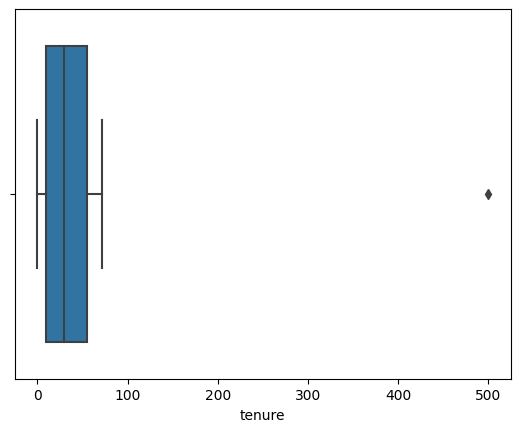

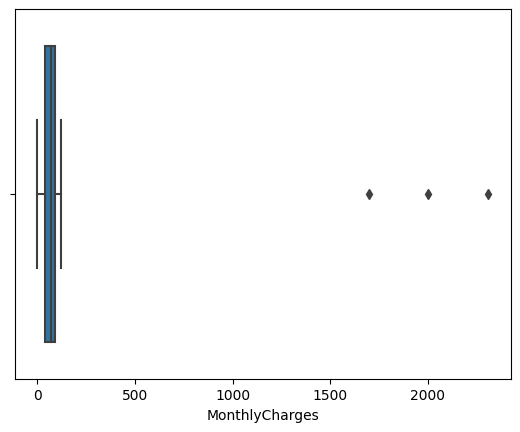

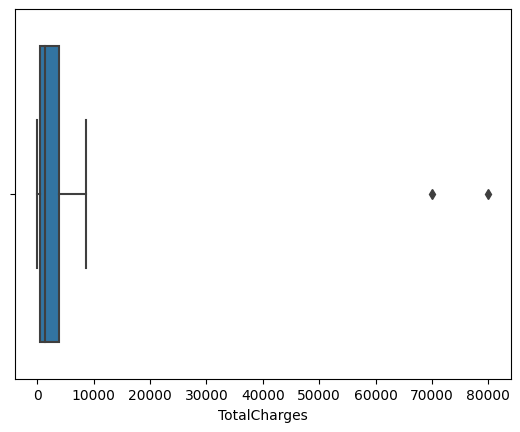

In [11]:
# Detecting Outliers (Boxplot)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('\nData distribution before handling Outliers: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['tenure'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

Overcoming Outliers

After we know which variables have outliers, then we will handle the outliers using the interquartile range (IQR) method. For more details, see the illustration below:
 
Use the results from the processing in the previous stage df_load to be processed in this stage. Use the quantile() function to see the specific quantile, and use mask() to replace the value. Determine:
- Minimum and maximum data values tolerated
- Convert values that are outside the minimum & maximum range into minimum and maximum values

In [12]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('The maximum value of each variable is: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nThe minimum value of each variable is: ')
print(minimum)

more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

print('\nData distribution after handling Outliers: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


The maximum value of each variable is: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

The minimum value of each variable is: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


C:\Users\MyPC\AppData\Local\Temp\ipykernel_11456\4260572871.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than     = (df_load > maximum)
C:\Users\MyPC\AppData\Local\Temp\ipykernel_11456\4260572871.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than    = (df_load < minimum)



Data distribution after handling Outliers: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


Insight :
From the three boxplots with the variables 'tenure', 'MonthlyCharges' & 'TotalCharges' it is clear that there are outliers. This can be identified from the presence of points that are far from the boxplot image. Then if we look at the distribution of the data from the max column there is also a very high value.
Then the outlier value is handled by changing the value to the maximum & minimum value of the interquartile range (IQR). After handling the outliers, and looking at the distribution of the data, it looks like there are no more outlier values.

In [13]:
# Detecting Nonstandard Values
# Input variable
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())



Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

Standardizing Categorical Variables

After we know which variables have non-standard values, then we standardize them with the most patterns, without changing their meaning. Example: Yes -> Yes Then look back at the unique values of each variable that has been changed.

In [14]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Input variable
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())



Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


Insight :

When we look further at the number of unique values of each categorical variable, it is clear that there are some variables that are not standardized. Those variables are:
- Gender (Female, Male, Woman, Man), which can be standardized to (Female, Male) because it has the same meaning.
- Dependents (Yes, No, Yes), which can be standardized to (Yes, No) because they have the same meaning.
- Churn (Yes, No, Churn), which can be standardized to (Yes, No) because they have the same meaning.
After we standardize the value, and we observe the data form again, it is well standardized for the unique value.